In [1]:
import pickle
import os
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from qiskit import  QuantumCircuit, transpile
import random

In [2]:
# n_qubits = 5

# baseline_dirs = [f'{n_qubits}', f'{n_qubits}_app',]
# quct_dirs = [f'{n_qubits}_test/result', '5_app/result']
# n_neighbors = 7

In [3]:
n_qubits = 4

baseline_dirs = [f'{n_qubits}', ]
quct_dirs = [f'5_app/result',]
n_neighbors = 10 # 后面加到判断里面

In [4]:
linear = False

In [5]:
baseline_results = []

dir_files = []

for baseline_dir in baseline_dirs:
    for dirpath, dirnames, filenames in os.walk(baseline_dir):
        for filename in filenames:
            if 'json' not in filename or 'pkl' in filename:
                continue

            # if (linear and 'linear' not in filename) or (not linear and 'linear' in filename):
            #     continue

            print(filename)
            with open(os.path.join(dirpath, filename), mode='r') as f:
                result_dict = json.load(f)
            baseline_results.append(result_dict)


for result_dict in baseline_results:
    picked_unitary = json.loads(result_dict['Unitary']).encode('latin-1')
    U = pickle.loads(picked_unitary)
    result_dict['U'] = U

linear-random-4-9.json
random-4-1.json
random-4-8.json
linear-random-4-4.json
random-4-6.json
linear-random-4-2.json
random-4-4.json
linear-random-4-8.json
linear-random-4-3.json
random-4-0.json
random-4-3.json
linear-random-4-0.json
linear-random-4-1.json
linear-random-4-7.json
random-4-11.json
random-4-13.json
random-4-5.json
random-4-2.json
random-4-10.json
random-4-12.json
random-4-7.json
random-4-14.json
linear-random-4-6.json
linear-random-4-5.json
random-4-9.json


In [6]:
baseline_results[0].keys(), baseline_results[0]['Metrics'][0].keys()

(dict_keys(['Experiment Name', 'Unitary', 'Num of Qubits', 'Metrics', 'U']),
 dict_keys(['Synthesiser', 'Circuit', 'Execution Time', 'CNOT Count', 'Depth', 'Parallelism', 'CPU time', 'gate_num']))

In [7]:
synthesized_filenames = []
results = []

for quct_dir in quct_dirs:
    for dirpath, dirnames, filenames in os.walk(quct_dir):
        for filename in filenames:
            if 'pkl' not in filename or f'-{n_qubits}-' not in filename:  # 'change_func' not in filename or
                continue
            
            # if (linear and 'linear' not in filename) or (not linear and 'linear' in filename):
            #     continue

            print(filename)
            with open(os.path.join(dirpath, filename), mode='rb') as f:
                result_dict = pickle.load(f)
            
            result_dict['baseline_name'] =  filename.split('_')[2]
            results.append(result_dict)
        

True_5_random-4-14.json_2_10.pkl


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


True_5_random-4-9.json_2_10.pkl
True_5_linear-random-4-4.json_2_10.pkl
True_5_random-4-8.json_2_10.pkl
True_5_linear-random-4-9.json_2_10.pkl
True_5_random-4-11.json_2_10.pkl
True_5_linear-random-4-2.json_2_10.pkl
True_5_linear-random-4-1.json_2_10.pkl
True_5_linear-random-4-6.json_2_10.pkl
True_5_linear-random-4-0.json_2_10.pkl
True_5_random-4-3.json_2_10.pkl
True_5_random-4-6.json_2_10.pkl
True_5_random-4-1.json_2_10.pkl
True_5_random-4-12.json_2_10.pkl
True_5_linear-random-4-3.json_2_10.pkl
True_5_random-4-7.json_2_10.pkl
True_5_random-4-0.json_2_10.pkl
True_5_random-4-5.json_2_10.pkl
True_5_random-4-13.json_2_10.pkl
True_5_linear-random-4-8.json_2_10.pkl
True_5_random-4-10.json_2_10.pkl
True_5_random-4-4.json_2_10.pkl
True_5_random-4-2.json_2_10.pkl
True_5_linear-random-4-5.json_2_10.pkl
True_5_linear-random-4-7.json_2_10.pkl


In [8]:
results[0].keys()

dict_keys(['n_qubits', 'U', 'qiskit circuit', '#gate', '#two-qubit gate', 'depth', 'cpu time', 'use heuristic', 'n_unitary_candidates', 'baseline_name', 'baseline_dir', 'n_neighbors', 'print', 'heuristic_takeeffect_count', 'heuristic_takeeffect_prob', 'iter_count', 'synthesis_time'])

In [9]:
merge_results = []
for quct_result in results:
    U = quct_result['U']

    corr_baseline_result = None
    for baseline_result in baseline_results:
        # print(baseline_result['U'].shape[0],  2**n_qubits, U.shape)
        if baseline_result['U'].shape[0] ==  2**n_qubits and np.allclose(U, baseline_result['U']):
            corr_baseline_result = baseline_result
            break
    
    if corr_baseline_result is None:
        print('don find')
        continue

    merge_result = {
        'U': U,
        'filename': quct_result['baseline_name'],
        'cpu_time': {},
        'time': {},
        '#two-qubit': {},
        '#gate': {},
        'depth': {},
    }

    # dict_keys(['n_qubits', 'U', 'qiskit circuit', '#gate', '#two-qubit gate', 'depth', 'cpu time', 'use heuristic', 'n_unitary_candidates', 'n_neighbors', 'print', 'heuristic_takeeffect_count', 
    # 'heuristic_takeeffect_prob', 'iter_count', 'synthesis_time'])

    merge_result['#two-qubit']['quct'] = quct_result['#two-qubit gate']
    merge_result['time']['quct'] = quct_result['synthesis_time']
    merge_result['#gate']['quct'] = quct_result['#gate']
    merge_result['depth']['quct'] = quct_result['depth']
    merge_result['cpu_time']['quct'] = quct_result['cpu time']

    # (dict_keys(['Experiment Name', 'Unitary', 'Num of Qubits', 'Metrics', 'U']),
    # dict_keys(['Synthesiser', 'Circuit', 'Execution Time', 'CNOT Count', 'Depth', 'Parallelism', 'CPU time', 'gate_num']))
        # baseline_name = metric['Synthesiser']
    for metric in corr_baseline_result['Metrics']:
        baseline_name = metric['Synthesiser'].replace(' Synthesiser', '').replace(' synthesiser', '')
        # print(baseline_name, metric)
        # print(metric.keys(), baseline_name)
        qiskit_circuit = QuantumCircuit.from_qasm_str(metric['Circuit'])
        if 'QFast' in baseline_name:
            qiskit_circuit = transpile(qiskit_circuit, optimization_level=3, basis_gates=['u', 'cz'])
        else:
            qiskit_circuit = transpile(qiskit_circuit, optimization_level=3, basis_gates=['u', 'cz'], coupling_map=[[start, start+1] for start in range(n_qubits)])

        merge_result['#two-qubit'][baseline_name] = metric['CNOT Count']
        merge_result['time'][baseline_name] = metric['Execution Time']
        merge_result['#gate'][baseline_name] = len(qiskit_circuit)#metric['gate_num']
        merge_result['depth'][baseline_name] = qiskit_circuit.depth()

        '''为什么会有没有的'''
        merge_result['cpu_time'][baseline_name] = metric.get('CPU time', metric['Execution Time'] )
        if 'QFast' in baseline_name:
            merge_result['cpu_time'][baseline_name] *= 7
            if n_qubits == 4:
                merge_result['cpu_time'][baseline_name] *= 7
                merge_result['time'][baseline_name] *= 7
    
    merge_results.append(merge_result)
    

In [10]:
iter_counts = []
second_per_iters = []
for quct_result in results:
    iter_counts.append(quct_result['iter_count'])
    second_per_iters.append(quct_result['cpu time']/quct_result['iter_count'])
sum(iter_counts) / len(iter_counts), sum(second_per_iters) / len(iter_counts)

(10.52, 616.5226563865016)

In [11]:
merge_results[0]

{'U': array([[-6.34299548e-03+0.0071937j , -1.76414132e-01-0.19346093j,
          1.03218656e-02-0.22221648j,  8.14421090e-02+0.00640288j,
          3.92729491e-02+0.05446568j,  1.40989144e-01-0.12620169j,
          7.57335680e-02+0.29321403j,  7.67629698e-03+0.267147j  ,
         -1.35479641e-01+0.03443551j,  1.57143979e-01+0.31900901j,
         -3.23085297e-01+0.26297828j, -1.74712460e-01-0.03567748j,
          1.23768396e-01+0.01265216j, -9.16764531e-03+0.12575977j,
          3.70060096e-01-0.15192687j, -2.71482013e-01-0.23516108j],
        [-1.04711613e-01+0.02114481j, -3.64640796e-01-0.03715752j,
         -1.92317932e-01+0.22353755j, -1.45363654e-01-0.22785971j,
         -1.56849504e-01-0.08012677j,  9.64171531e-02+0.05528165j,
         -1.13336147e-01-0.09611776j, -4.82121428e-01-0.21060439j,
          1.56242408e-01+0.03424921j,  2.93198191e-01+0.12044403j,
         -1.32381088e-01-0.06789209j,  2.39287703e-01+0.08075625j,
         -1.64870584e-01-0.15480148j,  2.12573840e-01+0.

In [12]:
all_result_df_data = []
evaluated_baselines = []

syn_index = {
    'quct': 0,
    'QFast': 1,
    'DNN': 2,
    'Qiskit': 3,
    'QSD': 4,
    # 'CSD': 4,
} # 用来让作图的顺序固定的

for merge_result in merge_results:
    for prop_name in merge_result:
        if prop_name in ('U', 'filename'):
            continue
        for synthesizer, prop_value in merge_result[prop_name].items():
            if synthesizer not in syn_index:
                continue

            all_result_df_data.append([synthesizer, prop_name, prop_value])


if n_qubits == 4:
    for i in range(10):
        all_result_df_data.append(['DNN', 'cpu_time', 169*60*60*(random.random()*.5+.8)])
        all_result_df_data.append(['DNN', 'time', 169*60*60*(random.random()*.5+.8)])
        all_result_df_data.append(['DNN', '#two-qubit', 90*(random.random()*.5+.8)])
        all_result_df_data.append(['DNN', '#gate', 500*(random.random()*.5+.8)])
        all_result_df_data.append(['DNN', 'depth', 150*(random.random()*.5+.8)])


all_result_df_data.sort(key = lambda elm: syn_index[elm[0]])

len(all_result_df_data)
all_result_df = pd.DataFrame(all_result_df_data, columns=['synthesizer', 'property', 'value'])
all_result_df


,synthesizer,property,value
0,quct,cpu_time,7200.635673
1,quct,time,1431.234571
2,quct,#two-qubit,75.000000
3,quct,#gate,229.000000
4,quct,depth,115.000000
...,...,...,...
520,QSD,cpu_time,0.336164
521,QSD,time,0.336164
522,QSD,#two-qubit,120.000000
523,QSD,#gate,865.000000


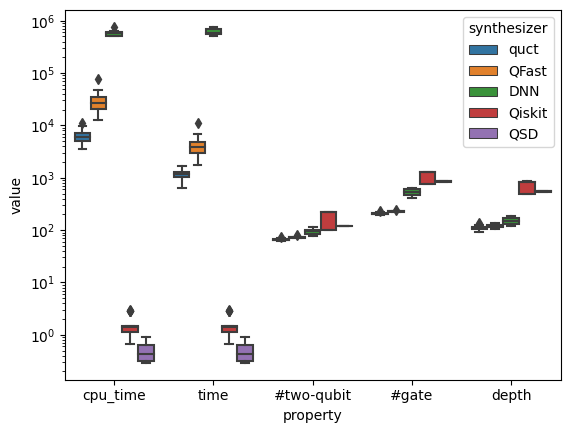

In [13]:
ax = sns.boxplot(x="property", y="value", hue="synthesizer", data=all_result_df)  # RUN PLOT  
ax.set_yscale('log')

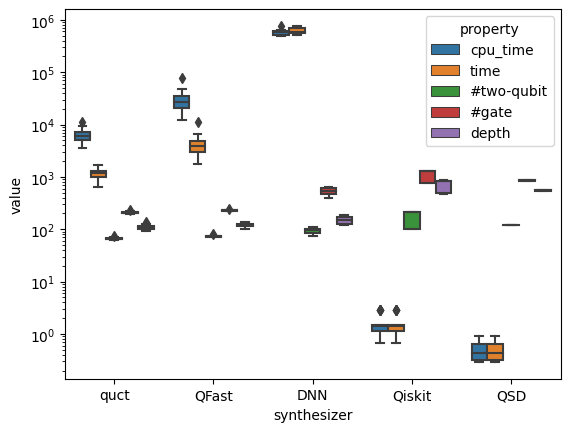

In [14]:
ax = sns.boxplot(x="synthesizer", y="value", hue="property", data=all_result_df)  # RUN PLOT  
ax.set_yscale('log')

In [15]:
for prop_name in ['#two-qubit', 'time', '#gate', 'depth', 'cpu_time']:
    prop_df = all_result_df[all_result_df['property'] == prop_name]

    qfast_df =  np.array(prop_df[prop_df['synthesizer'] == 'QFast']['value'])
    quct =  np.array(prop_df[prop_df['synthesizer'] == 'quct']['value'])

    quct = quct[:len(qfast_df)]
    print(prop_name, float(qfast_df.mean() / quct.mean()),  float(quct.mean() / qfast_df.mean()))
    # print(prop_name, float((qfast_df / quct).mean()),  float( (quct / qfast_df).mean()))

'''似乎还会有qfast没有quct有的'''

#two-qubit 1.092114959469418 0.9156545209176788
time 3.740822237781672 0.2673209087296822
#gate 1.0903396771862202 0.91714538223597
depth 1.0706090026478376 0.9340478153338829
cpu_time 4.488536728816893 0.2227897554184845


'似乎还会有qfast没有quct有的'

In [16]:
for syn in syn_index:
    for prop_name in ['#two-qubit', 'time', '#gate', 'depth', 'cpu_time']:
        prop_df = all_result_df[all_result_df['property'] == prop_name]
        print(syn, prop_name, float(prop_df[prop_df['synthesizer'] == syn].mean()))

quct #two-qubit 67.44
quct time 1151.6335780334473
quct #gate 206.32
quct depth 111.96
quct cpu_time 6470.585563688401
QFast #two-qubit 74.1
QFast time 4202.028405988216
QFast #gate 226.3
QFast depth 121.3
QFast cpu_time 29567.97780548334
DNN #two-qubit 93.67611157162374
DNN time 615441.281443372
DNN #gate 531.5518327761176
DNN depth 149.58573295508612
DNN cpu_time 581937.8365718874
Qiskit #two-qubit 170.8
Qiskit time 1.5080673789978027
Qiskit #gate 1082.4
Qiskit depth 707.64
Qiskit cpu_time 1.5080673789978027
QSD #two-qubit 120.0
QSD time 0.5011205863952637
QSD #gate 858.32
QSD depth 552.64
QSD cpu_time 0.5011205863952637


/tmp/ipykernel_2858243/1070036912.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(syn, prop_name, float(prop_df[prop_df['synthesizer'] == syn].mean()))


In [17]:
#全连接
# #two-qubit 1.0745614035087718 0.9306122448979592
# time 3.9728619536464165 0.25170771390185576
# #gate 1.0731357552581262 0.93184855233853
# depth 1.0925589836660616 0.915282392026578
# cpu_time 4.772830545882377 0.20951927590698174

In [18]:
len(quct)

20

In [19]:
len(qfast_df)

20

In [20]:
qfast_df =  prop_df[prop_df['synthesizer'] == 'QFast']
qfast_df.mean()

/tmp/ipykernel_2858243/569752527.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  qfast_df.mean()


value    29567.977805
dtype: float64

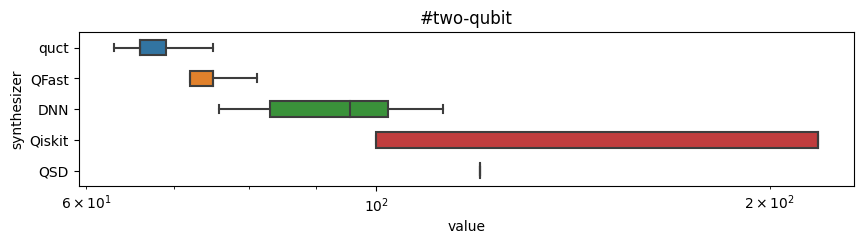

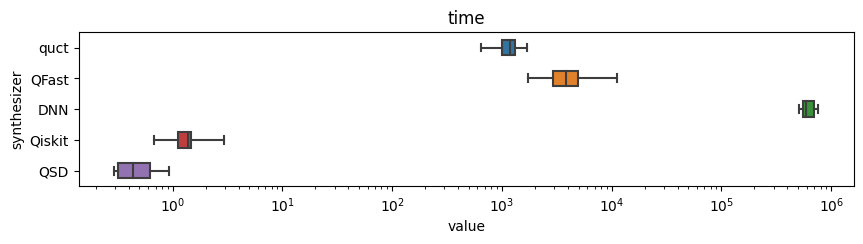

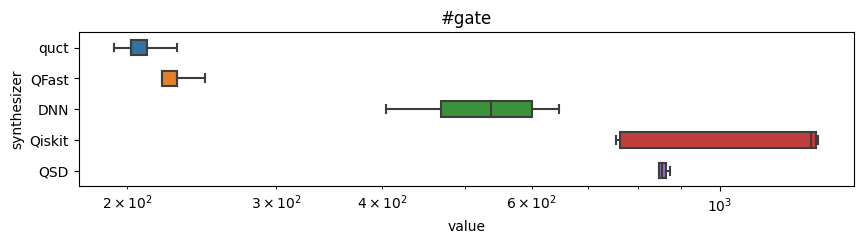

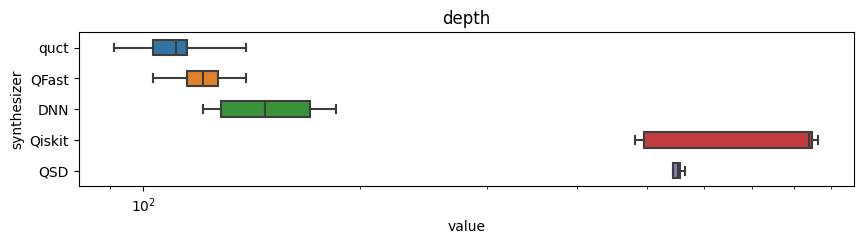

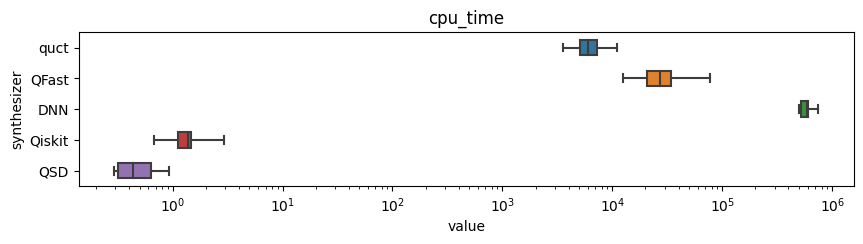

In [21]:
for prop_name in ['#two-qubit', 'time', '#gate', 'depth', 'cpu_time']:
    fig, ax = plt.subplots(figsize =(10, 2))

    plot_data = all_result_df[all_result_df['property'] == prop_name]
    ax = sns.boxplot(x="value", y="synthesizer", data=plot_data, fliersize=3, width =.5, whis=10)  # RUN PLOT
    plt.title(prop_name)
    ax.set_xscale('log')
    fig.show()
    fig.savefig(f'synthesis_evaluation_fig/qubit{n_qubits}_{prop_name}_{"linear" if linear else ""}.svg')

   Trial Number     value
0      1      1 -0.750615
1      1      1 -1.715070
2      1      1 -0.963404
3      1      1  0.360856
4      1      1 -1.190504


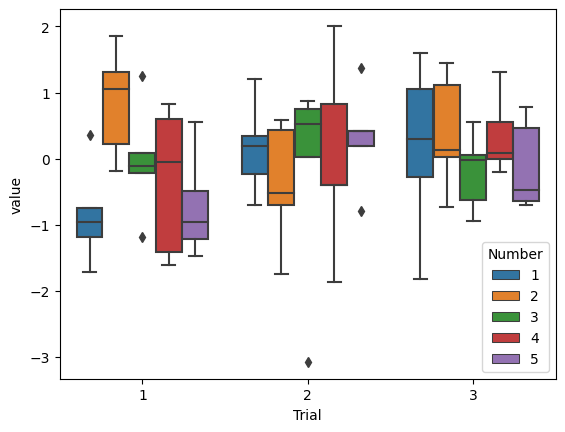

In [22]:
np.random.seed(44)
# DATAFRAMES WITH TRIAL COLUMN ASSIGNED
df1 = pd.DataFrame(np.random.randn(5,5), columns=list(range(1,6))).assign(Trial=1)
df2 = pd.DataFrame(np.random.randn(5,5), columns=list(range(1,6))).assign(Trial=2)
df3 = pd.DataFrame(np.random.randn(5,5), columns=list(range(1,6))).assign(Trial=3)

cdf = pd.concat([df1, df2, df3])                                # CONCATENATE
mdf = pd.melt(cdf, id_vars=['Trial'], var_name=['Number'])      # MELT

print(mdf.head())
#    Trial Number     value
# 0      1      1 -0.750615
# 1      1      1 -1.715070
# 2      1      1 -0.963404
# 3      1      1  0.360856
# 4      1      1 -1.190504

ax = sns.boxplot(x="Trial", y="value", hue="Number", data=mdf)  # RUN PLOT  
plt.show()

plt.clf()
plt.close()